In [97]:
%load_ext autoreload
%autoreload 2

from shared.commands import connect_to_rds

conn = connect_to_rds()
cur = conn.cursor()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Connection established


In [107]:
cur.execute("SELECT * FROM test_networks LIMIT 3000;")

networks = cur.fetchall()
print(len(networks))


2603


In [109]:
for i,k in enumerate(networks):
    print(k)
    if i == 10:
        break

(1, ['[CH2:1]=[C:2]([CH3:3])[C:4](=[O:5])[O:6][CH2:7][CH:8]([OH:9])[CH2:10][Cl:11]', '[Br:12][CH2:13][CH2:14][c:15]1[cH:16][cH:17][cH:18][cH:19][cH:20]1', '[cH:21]1[cH:22][cH:23][s:24][cH:25]1'], [], '[Br:12][CH2:13][CH2:14][c:15]1[cH:16][cH:17][cH:18][cH:19][cH:20]1.[CH2:1]=[C:2]([CH3:3])[C:4](=[O:5])[O:6][CH2:7][CH:8]([OH:9])[CH2:10][Cl:11].[cH:21]1[cH:22][cH:23][s:24][cH:25]1', 'BrCCc1ccccc1.C=C(C)C(=O)OCC(O)CCl.c1ccsc1', {'[cH:21]1[cH:22][cH:23][s:24][cH:25]1': [21, 22, 23, 24, 25], '[Br:12][CH2:13][CH2:14][c:15]1[cH:16][cH:17][cH:18][cH:19][cH:20]1': [12, 13, 14, 15, 16, 17, 18, 19, 20], '[CH2:1]=[C:2]([CH3:3])[C:4](=[O:5])[O:6][CH2:7][CH:8]([OH:9])[CH2:10][Cl:11]': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]}, {'1': 0.03534126281738281, '2': 0.08685755729675293, '3': 0.21644854545593262, '4': 0.742285966873169, '5': 2.7151846885681152}, {'1': 0.03535962104797363, '2': 0.12223529815673828, '3': 0.3386995792388916, '4': 1.081019401550293, '5': 3.7963438034057617}, {'[O;+1;H1:1]>>[O;H0;+0:1

In [6]:
from smarts_helper.webkit.etc.commands import Network

total_mech_cound_map = {}

for network in networks:
    colnames = [desc[0] for desc in cur.description]
    row_dict = dict(zip(colnames, networks[0]))
    network = Network(**row_dict)
    for jj in network.mech_count_map:
        if jj not in total_mech_cound_map:
            total_mech_cound_map[jj] = 0
        total_mech_cound_map[jj] += network.mech_count_map[jj]


{'[-1;C,O,S:1].[O,Cl,Br,I;H0;+0:2]-[C;H1,H2,H3;+0:3]>>[-1;O,Cl,Br,I;H0:2].[C;H1,H2,H3;+0:3]-[C,O,S;+0:1]': 1285882, '[O;H1;+0:1]>>[O;+1;H2:1]': 1231219, '[O;H1;+0:1]>>[O;-1;H0:1]': 1231219, '[C;H1,H2,H3;+0:1]-[C;+0:2]=[C;+0:3].[C;H0,H1,H2;+0:4]=[C;+0:5]>>[C;H1,H2,H3;+0:4]-[C;+0:5]-[C;+0:3]-[C;+0:2]=[C;H0,H1,H2;+0:1]': 952698, '[O;$([O]=[C]);H0;+0:1]>>[O;+1;$([O]=[C]);H1:1]': 494570, '[O;H0;+0:1]=[C;!$([C]([N])=[O]);+0:2]>>[O;+1;H1:1]=[C;!$([C]([N])=[O]);+0:2]': 494570, '[O;!$([O]=[C][N]);H0;+0:1]=[C;+0:2].[C;H1,H2,H3;+0:3]-[C;+0:4]=[C;+0:5]>>[O;!$([O]=[C][N]);H1;+0:1]-[C;+0:2]-[C;+0:5]-[C;+0:4]=[C;H0,H1,H2;+0:3]': 465937, '[O;-1;!$([O][+1]);!$([O][C][O;H0;+0]);H0:1]>>[O;!$([O][+1]);!$([O][C][O;H0;+0]);H1;+0:1]': 400862, '[O;H0;+0:1]=[C;!$([C]([N,O&H1,F,Cl,Br,I])=[O]);H0,H1;+0:2]-[C;H1,H2;+0:3]>>[O;H1;+0:1]-[C;!$([C]([N,O&H1,F,Cl,Br,I])=[O]);H0,H1;+0:2]=[C;H0,H1;+0:3]': 169195, '[O;+1;H1:1]>>[O;H0;+0:1]': 166592, '[O;+1;H1:1]=[C;!$([C]([N])=[O]);+0:2]>>[O;H1;+0:1]-[C;+1;!$([C]([N])=[O])

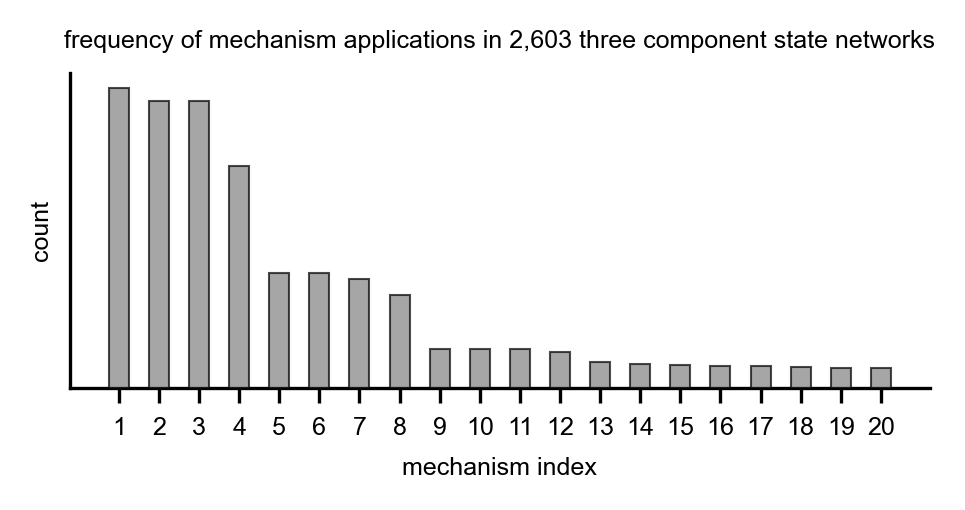

In [66]:
import matplotlib.pyplot as plt
import numpy as np
def plot_barchart(data_dict, title, n=None):

    # only top n
    if n:
        data_dict = dict(sorted(data_dict.items(), key=lambda item: item[1], reverse=True)[:n])

    print(data_dict)
    # take log10
    data_dict = {k: v for k, v in data_dict.items() if v > 0}
    # data_dict = {k: np.log10(v) for k, v in data_dict.items()}

    print(len(data_dict.keys()))

    fig, ax = plt.subplots(figsize=(3.3, 1.8), dpi=300) 

    ax.bar(data_dict.keys(), data_dict.values(), color='grey',
            edgecolor='black', linewidth=0.5, alpha=0.7, zorder=3, 
            width=0.5, align='center', capsize=3, ecolor='black')

    ax.set_xticks([i for i in range(len(data_dict.keys())) if i % 1 == 0])
    ax.set_xticklabels([str(i+1) for i in range(len(data_dict.keys()))if i % 1 == 0], fontsize=6, fontfamily='arial', rotation=0)
    ax.set_yticks([])
    ax.set_yticklabels([], fontsize=6, fontfamily='arial', color='black')
    ax.set_xlabel("mechanism index", fontsize=6, fontfamily='arial')
    ax.set_ylabel("count", fontsize=6, fontfamily='arial')
    ax.set_title(title, fontsize=6, fontfamily='arial')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    fig.tight_layout()
    plt.savefig(f"{title}.png", dpi=300, bbox_inches='tight', pad_inches=0.1)


plot_barchart(total_mech_cound_map, "frequency of mechanism applications in 2,603 three component state networks", 20)

In [114]:
from rdkit import Chem
sms = []
mols = []
for network in networks:
    colnames = [desc[0] for desc in cur.description]
    row_dict = dict(zip(colnames, network))
    net = Network(**row_dict)
    ns = net.input_unmapped_smiles.split(".")
    for n in ns:
        n = Chem.CanonSmiles(n)
        if n not in sms:
            sms.append(n)
            mols.append(Chem.MolFromSmiles(n))


In [118]:
print(len(sms))

39


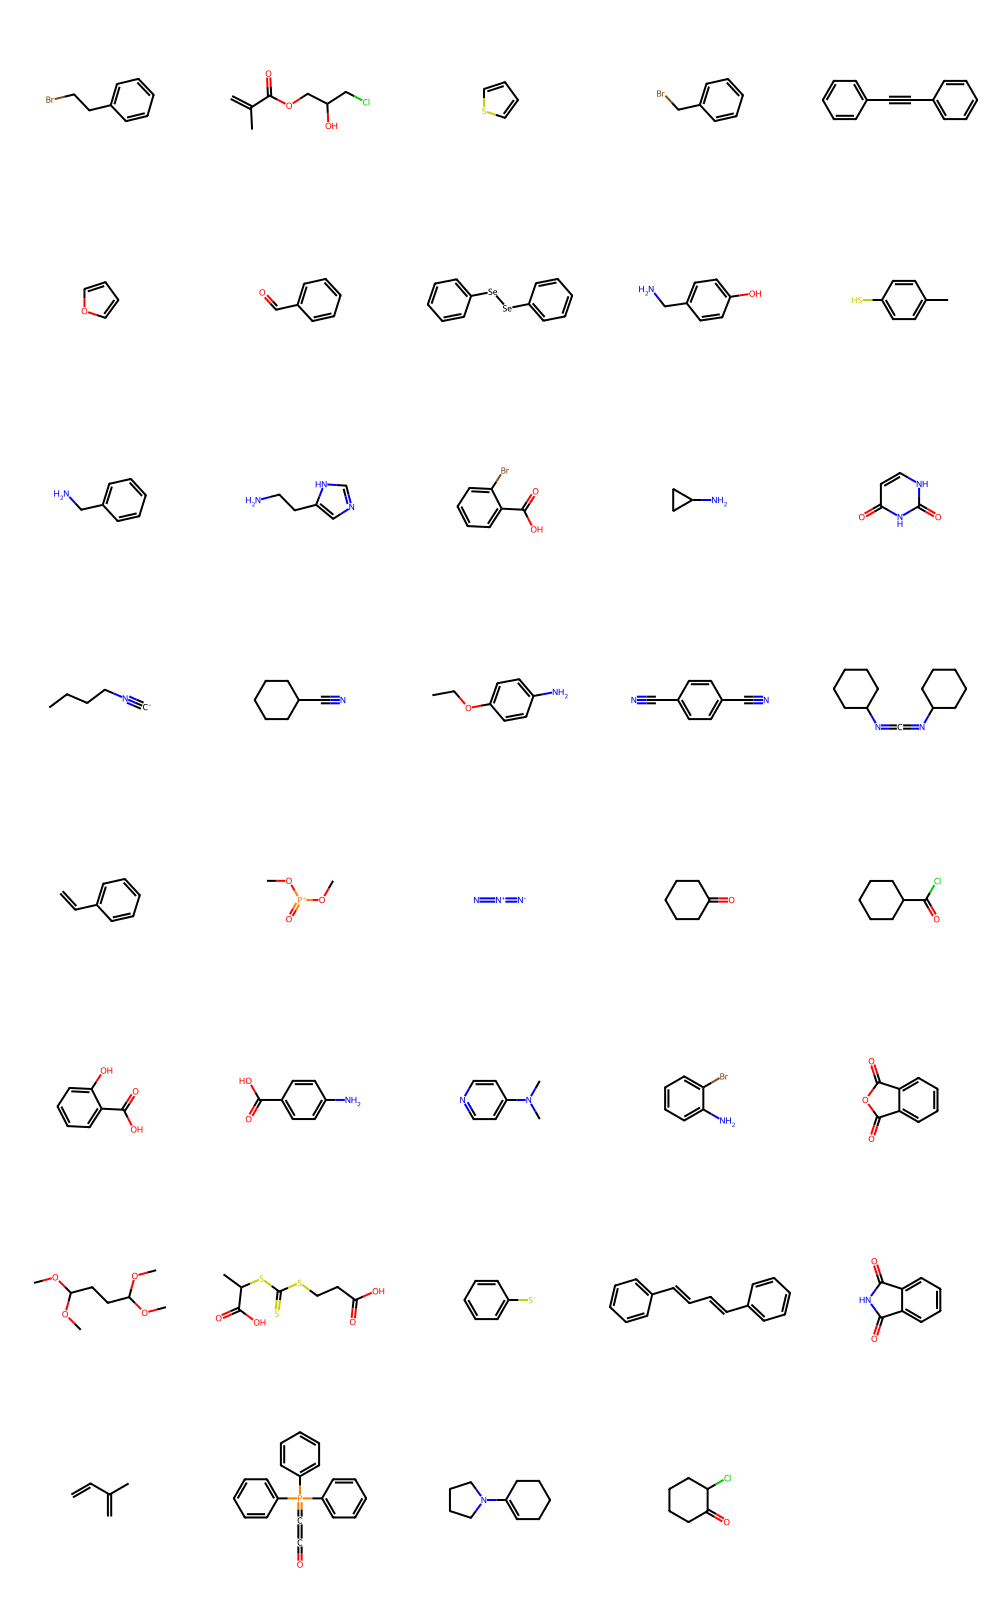

In [117]:
from rdkit.Chem import Draw

Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(200, 200))